In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [7]:
df = df.drop(columns=[])

In [8]:
# Convert the 'Species' column (labels) into numbers using LabelEncoder
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [9]:
# Separate features (X) and target (y)
X = df.drop(columns=['Type'])  # Input features
y = df['Type']                 # Target label

In [10]:
# Split the data into training and testing parts
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Scale the features using StandardScaler (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # Try k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

In [14]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6461538461538462

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67        19
           1       0.58      0.61      0.60        23
           2       0.00      0.00      0.00         4
           3       1.00      0.33      0.50         6
           4       0.60      1.00      0.75         3
           5       1.00      0.80      0.89        10

    accuracy                           0.65        65
   macro avg       0.63      0.59      0.57        65
weighted avg       0.65      0.65      0.62        65

Confusion Matrix:
 [[15  4  0  0  0  0]
 [ 8 14  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 1  3  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  1  8]]


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


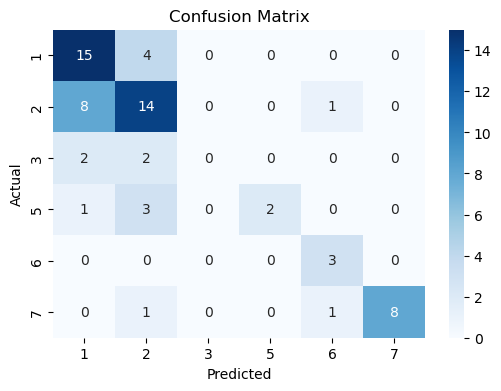

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()